<a href="https://colab.research.google.com/github/sgcortes/2023_NAPLES/blob/main/Lect1_ImagesOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="width:100%">
  <tr>
    <td><img src="https://unioviedo-my.sharepoint.com/:i:/g/personal/sgcortes_uniovi_es/Ebr0ybKDTBNKtoJyzmTBuRYBXY7nE-cCYaH-WDIVJxEVWA?&download=1" width="211" height="69" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></td>
    <td><font color=brown>ML&DL Naples 2023<br></font>
    <font color=green>Universidad de Oviedo. <br>Ingeniería en Geomática</font> <br><br>sgcortes@uniovi.es</td>
  </tr>
</table>

OpenCV es una librería libre para uso acadméico y comercial, desarrollada por Intel en C++, en un proyecto que nació en 1999 y que vio su primer versión en el 2000. Está disponible en https://opencv.org/ y tiene iterfaces para C++, Java y Python y es compatible con Windows, Linux, Mac Os iOS y Android. Es una de las librerías mas populares para la visión computador y el proceso de imagen. La emplearemos para ilustrar algunos de los algoritmos de procesado de imagen que estudiaremos. La documentación de la librería puede encontrarse en: https://docs.opencv.org/3.4.3/index.html

## 1.3 Python y OpenCV

Después de su instalación (que puede complicarse en ocasiones) para ser usada en Python es necesario importar el paquete **cv2**. 

In [ ]:
import cv2

### 1.3.1 Lectura de imágenes

In [ ]:
image = cv2.imread('Dublin_2.jpg',1)
cv2.imshow('imagen',image)
cv2.waitKey(0)
cv2.destroyAllWindows()  

El métodos **cv2.imread** permite leer la imagen, **cv2.imshow** (la muestra en una ventana externa de OpenCV).el método cv2.waikkey(0) espera 0 ms (es decir tiempo infinito) hasta que una tecla sea pulsada y el método cv2.destroyAllWindows cierra la ventana finalmente. Con el fin de poder visualizar en este documento las imágenes resultantes emplearemos el método imshow del módulo **matplotlib**, pero si se trabaja en un IDE externo (como Spyder) puede emplearse los métodos anteriores para la gestión de ventanas. Repitamos la versión ligeramente modificadad para pareciar las imágenes insertadas en este documento.

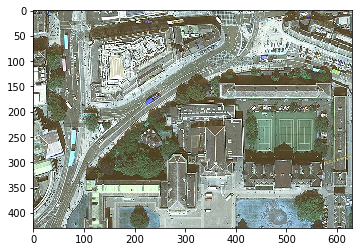

In [ ]:
import matplotlib.pyplot as plt
#este comando es para que los resultados se muestren insertados en el documento
%matplotlib inline 
image = cv2.imread('Dublin_2.jpg',1)
plt.imshow(image)

La función **cv2.imread(filename, arg2)** recibe como segundo argumento un indicador "flag" que puede tomar los siguientes valores:
- _cv2.IMREAD_COLOR_ (o el valor 1): para leer imágenes en color RGB
- _cv2.IMREAD_GRAYSCALE_ (o el valor 0): para leer imágenes en escala de grises
- _cv2.IMREAD_UNCHANGED_ (o el valor -1): para leer la imagen sin alteraciones tal (canales alfa incluidos)
Una peculiaridad de OpenCV es que almacena los canales de color en orden BGR (blue, gree, red) en lugar del habitual RGB que espera **matplotlib**. Por esta razón es necesario tomar precauciones invirtiendo el orden de los canales antes de visualizar la imagen. Veamos la diferencia con la imagen anterior.

In [ ]:
B, G, R = cv2.split(image)
img = cv2.merge((R,G,B))

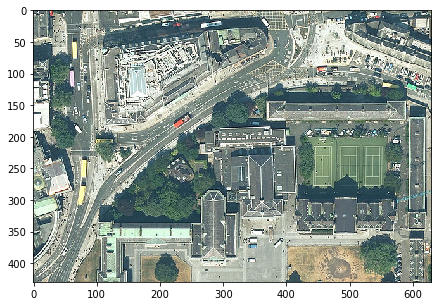

In [ ]:
fg=plt.figure(figsize=(9,5))
plt.imshow(img)
plt.show()

Podemos ver ahora como el autobús es realmente rojo en lugar de azul como en la imagen anterior.

### 1.3.2 Propiedades de la imagen

Es posible acceder a las propiedades de la imagen empleando las propiedades del módulo **numpy**

In [ ]:
 print( img.shape, img.size, img.dtype)

(430, 630, 3) 812700 uint8


### 1.3.3 Acceso a los elementos de la imagen

Dado que la información de la imagen está almacenada en una matriz de **NumPy**. Es posible acceder a los elementos de una imagen como es habitual en ese módulo.

In [ ]:
print(img[100,100,0])

230


El acceso a píxeles individuales es lento puesto que NumPy está pensado para manejo matricial. Para acelerarlo se puede emplear **img.item** y **img.itemset** para modificarlo.

In [ ]:
print(img.item(100,100,0))
print('Valor del pixel rojo modificado')
img.itemset((100,100,0), 20)
print(img.item(100,100,0))

230
Valor del pixel rojo modificado
20


### 1.3.4 Escribir una imagen

La función para escribir imágenes es: **cv2.imwrite(nombre, variable)**. Modifiquemos nuestra imagen _Dublin2.jpg_ escribámosla y leámosla de nuevo para mostrar que la escritura es correcta.

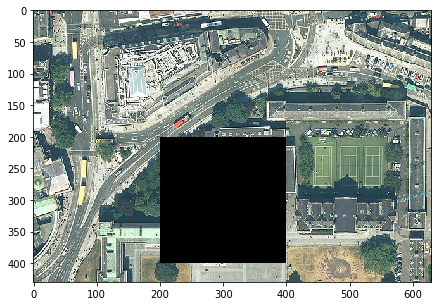

In [ ]:
img[200:400,200:400,:]=0
cv2.imwrite('Dublin3.jpg',img)
img[200:400,200:400,:]=0
image2=cv2.imread('Dublin3.jpg')
fg=plt.figure(figsize=(9,5))
plt.imshow(image2)
plt.show()

Es curioso notar que al leer la imagen escrita por OpenCV y mostrarla no es necesario realizar el cambio de orden de los canales, porque parece que OpenCV los escribe en su orden correcto RGB.